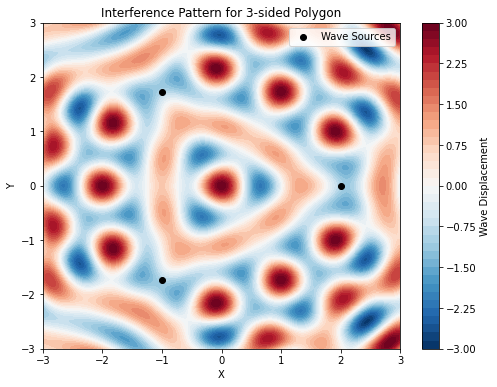

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 1  # Amplitude
wavelength = 1  # Wavelength
k = 2 * np.pi / wavelength  # Wave number
omega = 2 * np.pi  # Angular frequency
phi_0 = 0  # Initial phase
num_sources = 3  # Number of sources (triangle)
radius = 2  # Radius of the polygon

def wave_displacement(x, y, t, sources):
    displacement = np.zeros_like(x)
    for (x_s, y_s) in sources:
        r = np.sqrt((x - x_s)**2 + (y - y_s)**2)
        displacement += A * np.cos(k * r - omega * t + phi_0)
    return displacement

# Define the polygon vertices
angles = np.linspace(0, 2 * np.pi, num_sources, endpoint=False)
sources = [(radius * np.cos(a), radius * np.sin(a)) for a in angles]

# Create a grid
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)
t = 0  # Snapshot at t=0

# Compute wave interference
Z = wave_displacement(X, Y, t, sources)

# Plot the interference pattern
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap='RdBu_r')
plt.colorbar(label='Wave Displacement')
plt.scatter(*zip(*sources), color='black', marker='o', label='Wave Sources')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Interference Pattern for {num_sources}-sided Polygon')
plt.show()